In [1]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('../')

In [2]:
from SHDataset import SHDataset
from utils.utils import *
from utils.metrics import *

bbox = (52.34, 52.36, 4.895, 4.93)
dataset = SHDataset(noise=False)
G1,T1,G2,T2 = dataset.read_snapshots(0, bbox=bbox)

In [3]:
from models.hmm import HMMChangeDetector

hmm_det = HMMChangeDetector(G1)

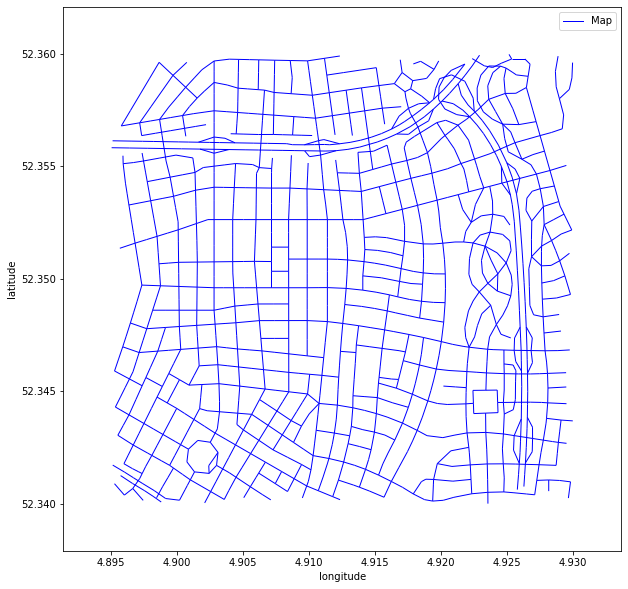

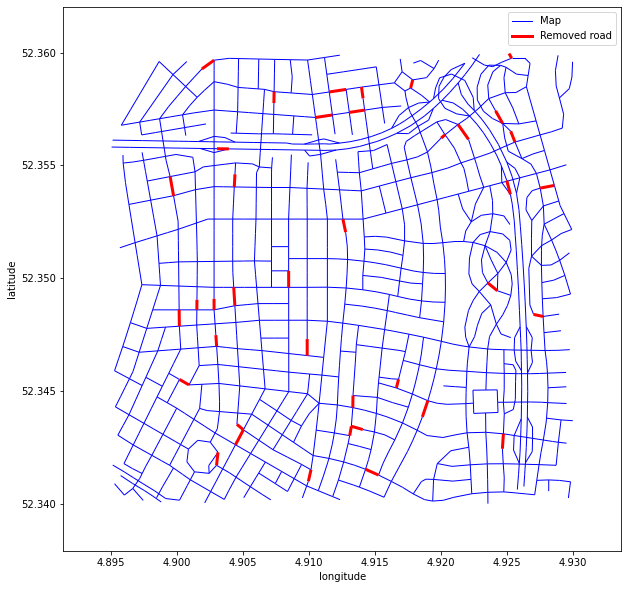

In [11]:
plot_graph(G1, figsize=(10,10))
G12_diff = compare_snapshots(G1, G2)[1]
plot_graph(G12_diff, figsize=(10,10), removed_road_edge_width=3)

In [72]:
from multiprocessing import Pool
from tqdm import tqdm
import random

def find_hmm_mismatches_parallel(G1, T2):
    hmm_det = HMMChangeDetector(G1)
    removed_edges = [(edge[0], edge[1]) for edge in G1.edges(data=True) if edge[2]['color'] == 'red']
    not_matched = []
    mismatched = []
    for t in tqdm(T2, desc='Matching trajectories'):
        path = hmm_det.map_match_trajectory(t)
        if len(path) == 0:
            not_matched.append(t)
            continue
        else:
            mismatched_t = False
            for e in path:
                if e in removed_edges:
                    mismatched_t = True
            if mismatched_t:
                mismatched.append(t, path)
        
    return not_matched, mismatched

def find_hmm_mismatches(G1, T2, num_cpu=64):
    G1 = G1.copy()
    
    # Split trajectories into equal sized chunks given cpu count
    T2 = np.array_split(T2, num_cpu)
    pool_input = [(G1, t) for t in T2]

    # Create processes pool and input
    pool = Pool(num_cpu)

    # Run pool map
    results = pool.starmap(find_hmm_mismatches_parallel, pool_input)
    pool.close()
    pool.join()
    
    not_matched, mismatched = [], []
    for r in results:
        not_matched += r[0]
        mismatched += r[1]
    
    return not_matched, mismatched

def save_hmm_mismatches(G1, results):
    not_matched, mismatched = results
    removed_edges = [(edge[0], edge[1]) for edge in G1.edges(data=True) if edge[2]['color'] == 'red']
#     for i, nm in enumerate(not_matched):
#         print(f'Not matched {i}')
#         plot_graph(snapshot_to_nxgraph(G1, [nm]), zoom_on_traj=True, T_edge_width=2, T_node_size=5, show_nodes=True)
    for i, mm in enumerate(mismatched):
        print(f'Not matched {i}')
        t, path = mm
        mismatched_edges = []
        remaining_path = []
        for edge in removed_edges:
            if edge in path:
                mismatched_edges.append(edge)
            else:
                remaining_path.append(edge)
        path_remaining_colors = {edge: 'green' for edge in remaining_path}
        path_removed_colors =  {edge: 'orange' for edge in mismatched_edges}
        
        nx.set_edge_attributes(G1, path_remaining_colors, name='color')
        nx.set_edge_attributes(G1, path_removed_colors, name='color')
        
        plot_graph(snapshot_to_nxgraph(G1, [t]), zoom_on_traj=True)


In [70]:
sample_size = 10000
T2_sample = random.sample(T2['T'], sample_size)
results = find_hmm_mismatches(G12_diff, T2_sample)

Matching trajectories: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:53<00:00,  2.94it/s]

Matching trajectories: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:58<00:00,  2.66it/s]


Matching trajectories: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [01:00<00:00,  2.57it/s]


TypeError: append() takes exactly one argument (2 given)

Process ForkPoolWorker-371:
Process ForkPoolWorker-401:
Process ForkPoolWorker-349:
Process ForkPoolWorker-363:
Process ForkPoolWorker-383:
Process ForkPoolWorker-369:
Process ForkPoolWorker-352:
Process ForkPoolWorker-374:
Process ForkPoolWorker-356:
Process ForkPoolWorker-391:
Process ForkPoolWorker-353:
Process ForkPoolWorker-404:
Process ForkPoolWorker-406:
Process ForkPoolWorker-361:
Process ForkPoolWorker-360:
Process ForkPoolWorker-365:
Process ForkPoolWorker-350:
Process ForkPoolWorker-387:
Process ForkPoolWorker-392:
Process ForkPoolWorker-388:
Process ForkPoolWorker-368:
Process ForkPoolWorker-386:
Process ForkPoolWorker-394:
Process ForkPoolWorker-357:
Process ForkPoolWorker-395:
Process ForkPoolWorker-375:
Process ForkPoolWorker-384:
Process ForkPoolWorker-402:
Process ForkPoolWorker-403:
Process ForkPoolWorker-378:
Process ForkPoolWorker-376:
Process ForkPoolWorker-359:
Process ForkPoolWorker-354:
Process ForkPoolWorker-396:
Process ForkPoolWorker-348:
Process ForkPoolWork

  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 313, in _bootstrap
    self.run()
  File "

  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/process.py", line 108, in run
    self._

  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/home/stuff/software/python/3.8.0/lib/py

  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/queues.py", line 355, in get
    with self._rlock:
  File "/home/st

  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
    return self._semlock.__enter__()
  File "/home/stuff/software/python/3.8.0/lib/python3.8/multiprocessing/synchronize.py", line 95, in __enter__
 

In [73]:
save_hmm_mismatches(G12_diff, results)

In [74]:
results[1]

[]

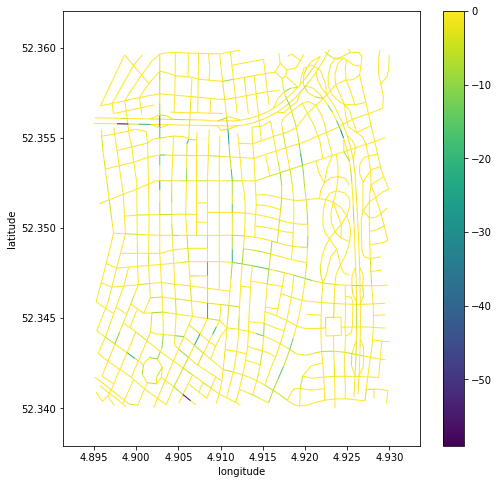

In [9]:
plot_graph(G1_pred, figsize=(8,8), use_weights=True)

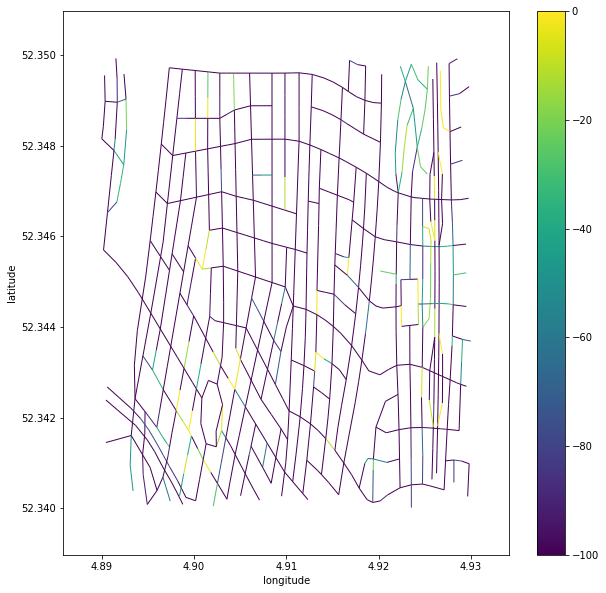

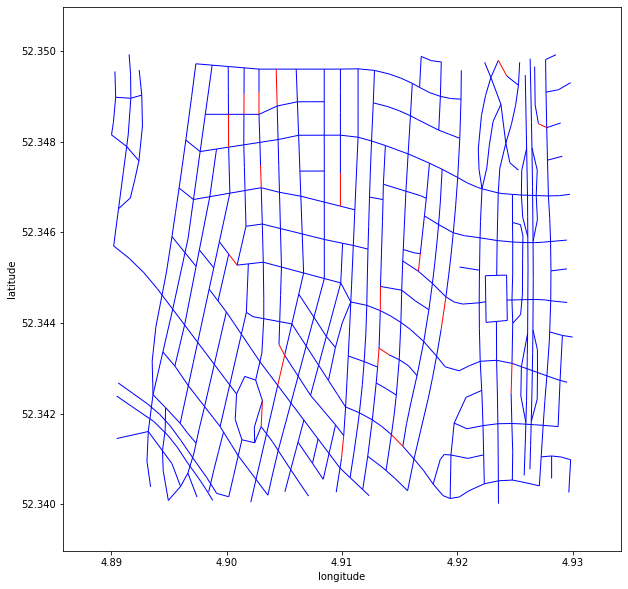

In [5]:
import pickle5 as pkl
import os

def read_hmm_scores(folder='./results/results_high_sample_v3', noise_config=0):
    subfolders = sorted([os.path.join(folder, f) for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))])
    folder = subfolders[noise_config]
    results = [os.path.join(folder, f) for f in os.listdir(folder) if 'hdf5' in f]
    if len(results) != 1:
        raise ValueError(f"Expected one results file (hdf5) in {results_folder}, but found {len(files)}: {files}")
    results_file = results[0]
    with open(results_file, 'rb') as handle:
        result = pkl.load(handle)
    
    scores = result['results']['hmm']['scores']
    
    return scores

def read_rb_scores(folder='./results/results_high_sample_v3', noise_config=0):
    subfolders = sorted([os.path.join(folder, f) for f in os.listdir(folder) if os.path.isdir(os.path.join(folder, f))])
    folder = subfolders[noise_config]
    results = [os.path.join(folder, f) for f in os.listdir(folder) if 'hdf5' in f]
    if len(results) != 1:
        raise ValueError(f"Expected one results file (hdf5) in {results_folder}, but found {len(files)}: {files}")
    results_file = results[0]
    with open(results_file, 'rb') as handle:
        result = pkl.load(handle)
    
    scores = result['results']['rulebased']['scores']
    
    return scores

gt_labels = groundtruth_labels(G1, G2)
    
scores_hmm = read_hmm_scores()
scores_hmm = {edge: v if v > -100 else -100 for edge, v in scores_hmm.items()}
G1_weighted = G1.copy()
nx.set_edge_attributes(G1_weighted, scores_hmm, name='weight')
plot_graph(G1_weighted, figsize=(10,10), use_weights=True)
_, G12_d, _,_ = compare_snapshots(G1, G2)
plot_graph(G12_d, figsize=(10,10))

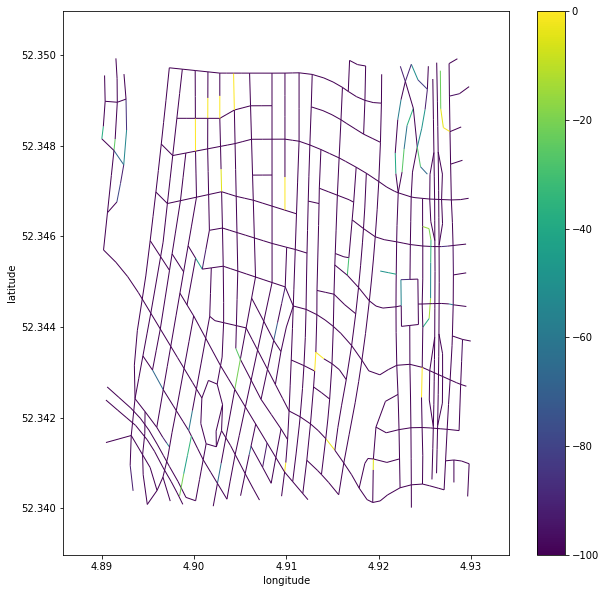

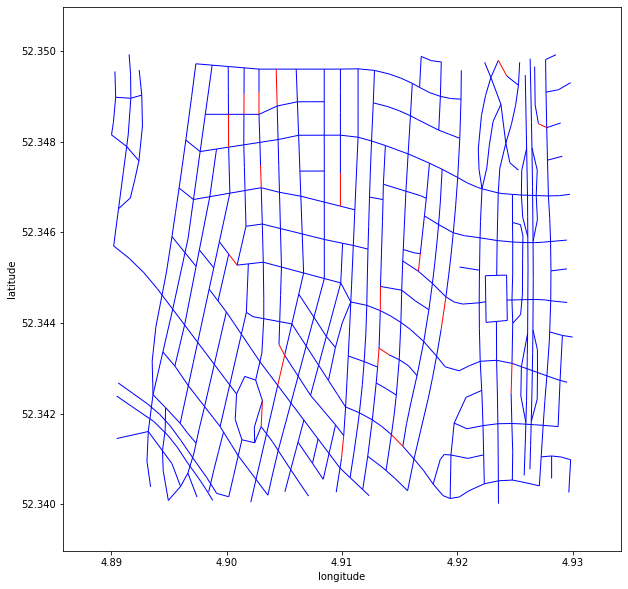

In [24]:
scores_rb = read_rb_scores()
scores_rb = {edge: v if v > -100 else -100 for edge, v in scores_rb.items()}
G1_weighted = G1.copy()
nx.set_edge_attributes(G1_weighted, scores_rb, name='weight')
plot_graph(G1_weighted, figsize=(10,10), use_weights=True)
_, G12_d, _,_ = compare_snapshots(G1, G2)
plot_graph(G12_d, figsize=(10,10))

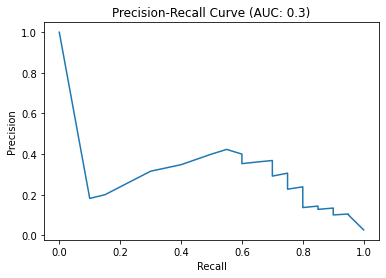

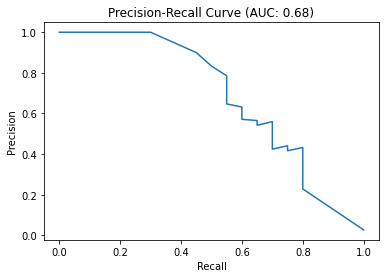

(array([0.02670227, 0.22857143, 0.23188406, 0.24242424, 0.24615385,
        0.26666667, 0.27118644, 0.28070175, 0.29090909, 0.2962963 ,
        0.30188679, 0.30769231, 0.31372549, 0.32      , 0.33333333,
        0.34042553, 0.34782609, 0.35555556, 0.36363636, 0.37209302,
        0.38095238, 0.3902439 , 0.4       , 0.41025641, 0.42105263,
        0.43243243, 0.41666667, 0.42857143, 0.44117647, 0.42424242,
        0.4375    , 0.4516129 , 0.46666667, 0.48275862, 0.5       ,
        0.51851852, 0.53846154, 0.56      , 0.54166667, 0.56521739,
        0.57142857, 0.6       , 0.63157895, 0.64705882, 0.6875    ,
        0.73333333, 0.78571429, 0.83333333, 0.9       , 1.        ,
        1.        ]),
 array([1.  , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 ,
        0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 , 0.8 ,
        0.8 , 0.8 , 0.8 , 0.8 , 0.75, 0.75, 0.75, 0.7 , 0.7 , 0.7 , 0.7 ,
        0.7 , 0.7 , 0.7 , 0.7 , 0.7 , 0.65, 0.65, 0.6 , 0.6 , 0.6 , 0.55,
  

In [25]:
from metrics import *

PRCurve(gt_labels, scores_hmm, log_scale=False)
PRCurve(gt_labels, scores_rb, log_scale=False)

In [11]:
gt_labels.keys() == scores_hmm.keys()

True

In [12]:
removed_roads = [edge for edge, v in gt_labels.items() if v == 1.0]

In [20]:
print(f'hmm scores for removed edges: {[scores_hmm[edge] for edge in removed_roads]}')
print(f'Sum of removed edges scores for hmm: {sum([scores_hmm[edge] for edge in removed_roads])}')

hmm scores for removed edges: [-11, -12, -2, -18, -62, -150, -3, 0, -30, -1, -4, -75, -6, -3, -4, -95, -2, -5, -2, 0]
Sum of removed edges scores for hmm: -485


In [22]:
print(f'rb scores for removed edges: {[scores_rb[edge] for edge in removed_roads]}')
print(f'Sum of removed edges scores for rb: {sum([scores_rb[edge] for edge in removed_roads])}')

rb scores for removed edges: [-4, 0, -1, 0, -834, -424, -44, -1, -51, -1, -420, -5, 0, -21, -26, 0, 0, 0, -261, -30]
Sum of removed edges scores for rb: -2123


In [ ]:
PRCurve(gt_labels, gt_labels, log_scale=False)

In [ ]:

ex = {k: int(gt_labels[k] == 0) for k in gt_labels}

In [27]:
removed_roads

[(236, 14871),
 (281, 4027),
 (2324, 10744),
 (3706, 19082),
 (5930, 8139),
 (6032, 32487),
 (6187, 16452),
 (8904, 27195),
 (9309, 12765),
 (9998, 20930),
 (11028, 29027),
 (12798, 23344),
 (14829, 24187),
 (18387, 19620),
 (18387, 21160),
 (18611, 20155),
 (20362, 28265),
 (20930, 32040),
 (21793, 26271),
 (22942, 24913)]

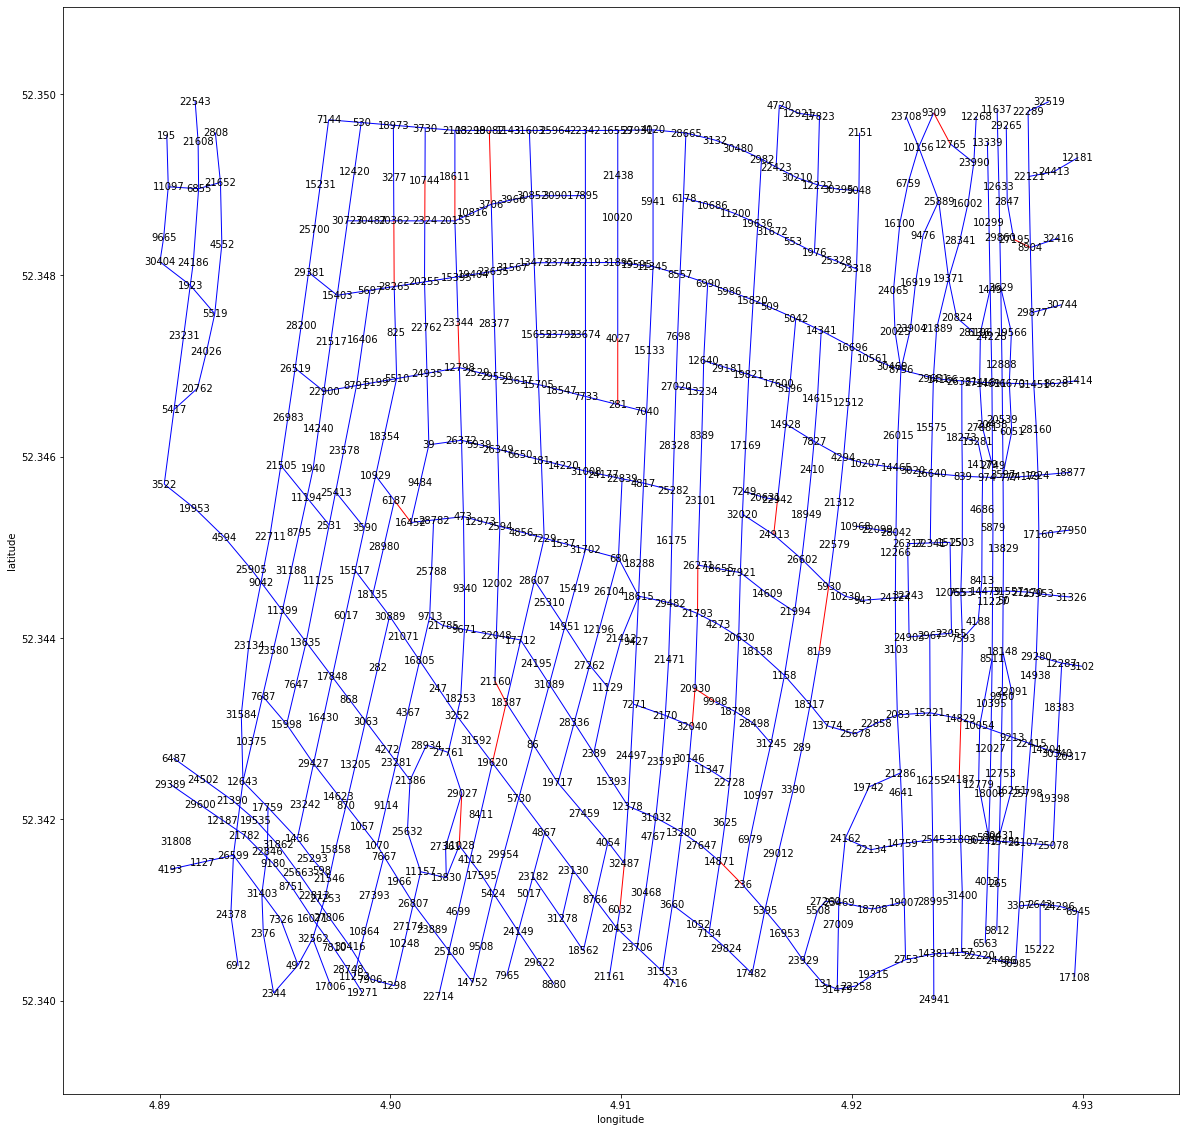

In [30]:

plot_graph(G12_d, figsize=(20,20), show_labels=True, fontsize=10)

In [6]:
import pickle5 as pkl
# Read mismatches trajectories
with open('./hmm_mismatches/mismatched_paths.hdf5', 'rb') as handle:
    mismatches = pkl.load(handle)
    
# Load the removed edges
dataset = SHDataset(noise=False, dataset_dir='./dataset/')
G1,T1,G2,T2 = dataset.read_snapshots(0)
G1,T1,G2,T2 = filter_bbox_snapshots(G1,T1,G2,T2, (52.34, 52.35, 4.89, 4.93))
_, G12_d, _, _ = compare_snapshots(G1,G2)
edge_colors = nx.get_edge_attributes(G12_d, name='color')
removed_edges = [edge for edge, col in edge_colors.items() if col == 'red']

(52.34188986254268, 52.35092755553262)

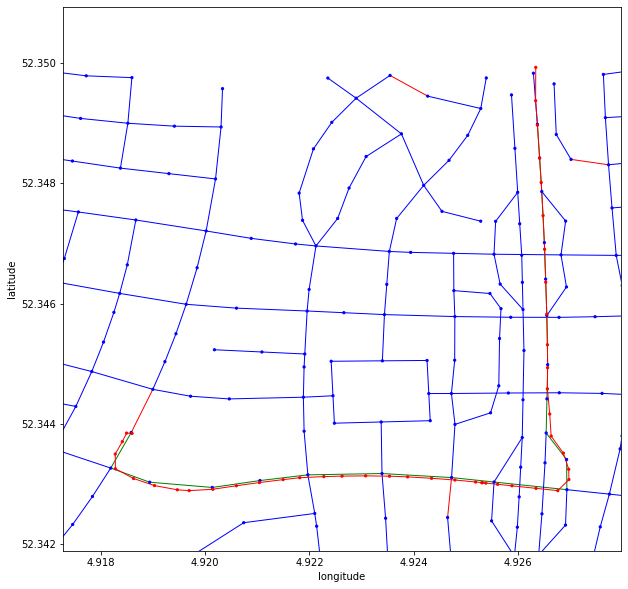

In [57]:
def hmm_match(t, G1, G2, use_latlon=False, obs_noise=10, obs_noise_ne=10, max_dist_init=200,
                max_dist=200, min_prob_norm=0.001, non_emitting_states=False, non_emitting_length_factor=0.75,
                max_lattice_width=None, dist_noise=10, dist_noise_ne=10, restrained_ne=True, avoid_goingback=False,
                enable_pbar=True):
    
    # Prepare change detector
    hmm_det = HMMChangeDetector(G1, use_latlon, obs_noise, obs_noise_ne, max_dist_init, max_dist,
                     min_prob_norm, non_emitting_states, non_emitting_length_factor,
                     max_lattice_width, dist_noise, dist_noise_ne, restrained_ne, avoid_goingback, enable_pbar=True)
    
    # Get removed edges
    _, G12_d, _,_ = compare_snapshots(G1, G2)
    edge_colors = nx.get_edge_attributes(G12_d, name='color')
    removed_edges = [edge for edge, col in edge_colors.items() if col == 'red']
    
    # Map match trajectory to path
    path = hmm_det.map_match_trajectory(t[0])
    
    # Get mismatched edges and color graph
    mismatched_edges = [edge for edge in path if edge in removed_edges]
    mismatched_colors = {edge: 'orange' for edge in mismatched_edges}
    
    # Color the path green
    path_colors = {edge: 'green' for edge in path}
    G1_path = G12_d.copy()
    nx.set_edge_attributes(G1_path, path_colors, name='color')
    
    # Color the mismatched edges as orange
    nx.set_edge_attributes(G1_path, mismatched_colors, name='color')
    G1_path = snapshot_to_nxgraph(G1_path, [t[0]])
    return G1_path

k = 1
G1_path = hmm_match(mismatches[k], G1, G2)
ax = plot_graph(G1_path, figsize=(10,10), show_img=False, show_nodes=True)
bounds = (
    min([i["lon"] for i in mismatches[k][0]]) - 1e-3,
    max([i["lon"] for i in mismatches[k][0]]) + 1e-3,
    min([i["lat"] for i in mismatches[k][0]]) - 1e-3,
    max([i["lat"] for i in mismatches[k][0]]) + 1e-3,
)
ax.set_xlim(*bounds[:2])
ax.set_ylim(*bounds[2:])
#plt.plot([0][:-2]], [i["lat"] for i in mismatches[2][0][:-2]], '*-')

In [73]:
mismatches[0][0][0]
{'lat': 52.348663010581895,
 'lon': 4.923909426815949,
 'speed': 6.401283,
 'x': -0.3785529,
 'y': -0.04150343,
 'z': 0.9246486,
 'heading': 337.7357137099604,
 'timestamp': '2/20/2077 11:25:19 AM',
 'gt_segment': 6970,
 'path_id': 95507,
 'pathpos_idx': 8}

d = np.dtype([("lat", "f8"), ("lon", "f8"), ("speed", "f4")])
x = np.zeros(10, dtype=d)
x[0] = 1,2,3
tracks = [x, x]
for t in tracks:
    for p in t:
        print(p["lat"])
        
print(x['lat'])
print(x)

1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[(1., 2., 3.) (0., 0., 0.) (0., 0., 0.) (0., 0., 0.) (0., 0., 0.)
 (0., 0., 0.) (0., 0., 0.) (0., 0., 0.) (0., 0., 0.) (0., 0., 0.)]


In [16]:
# Prep the change detector
# 68/266 fixed
# hmm_det = HMMChangeDetector(G1, use_latlon=True, obs_noise=50, obs_noise_ne=4, max_dist_init=200,
#                 max_dist=100, min_prob_norm=0.001, non_emitting_states=True, non_emitting_length_factor=0.75,
#                 max_lattice_width=None, dist_noise=10, dist_noise_ne=10, restrained_ne=True, avoid_goingback=True,
#                 enable_pbar=True)

# 209/266 fixed
# hmm_det = HMMChangeDetector(G1, use_latlon=True, obs_noise=4, obs_noise_ne=4, max_dist_init=100,
#                 max_dist=100, min_prob_norm=0.001, non_emitting_states=True, non_emitting_length_factor=0.75,
#                 max_lattice_width=None, dist_noise=10, dist_noise_ne=10, restrained_ne=True, avoid_goingback=True,
#                 enable_pbar=True)

# 219/266 fixed
hmm_det = HMMChangeDetector(G1, use_latlon=False, obs_noise=10, obs_noise_ne=10, max_dist_init=200,
                max_dist=200, min_prob_norm=0.001, non_emitting_states=False, non_emitting_length_factor=0.75,
                max_lattice_width=None, dist_noise=10, dist_noise_ne=10, restrained_ne=True, avoid_goingback=False,
                enable_pbar=True)

Found 5 fixes: : 20it [00:07,  3.10it/s]/home/waller/Documents/LatestRepo/SyntheticHighways/ChangeDetection/utils.py:144: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)
Found 20 fixes: : 55it [00:22,  2.50it/s]


20/55 trajectories have been fixed st they dont traverse removed edges


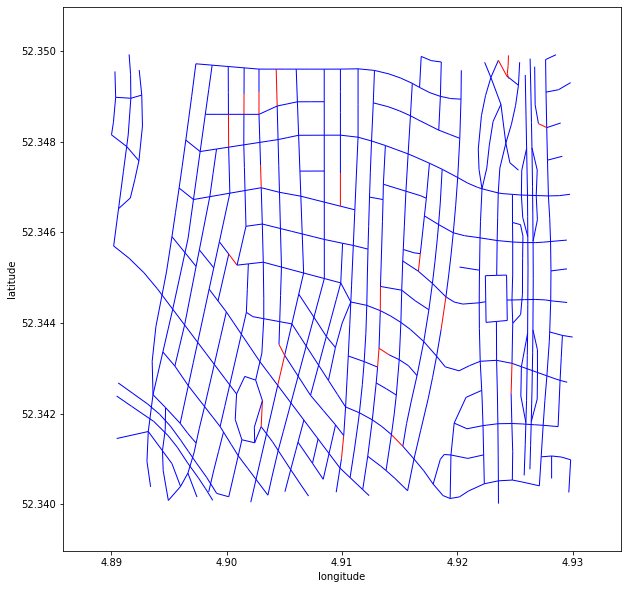

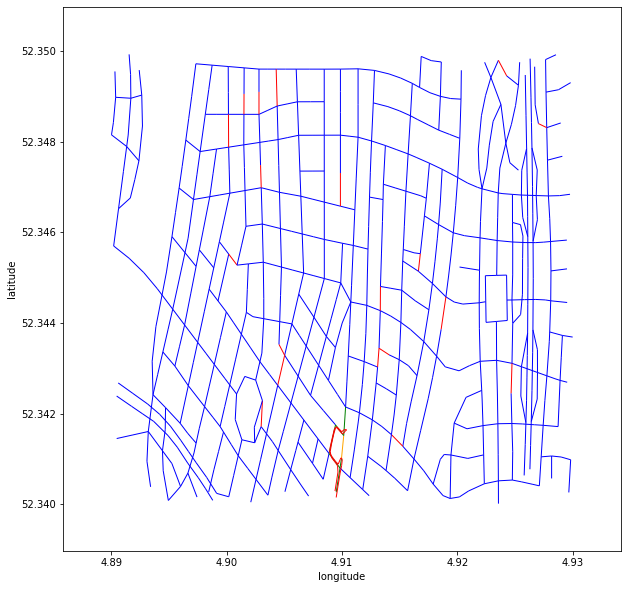

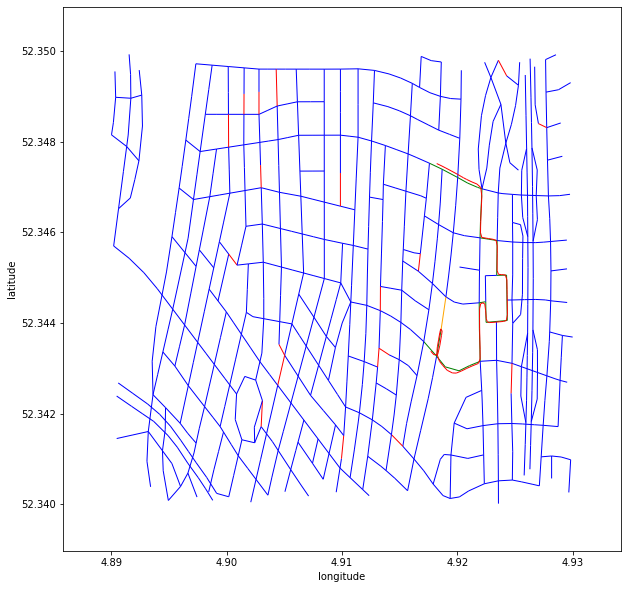

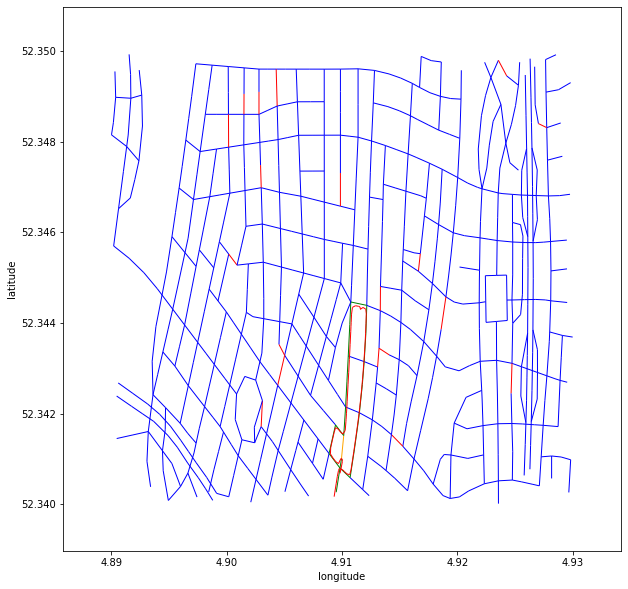

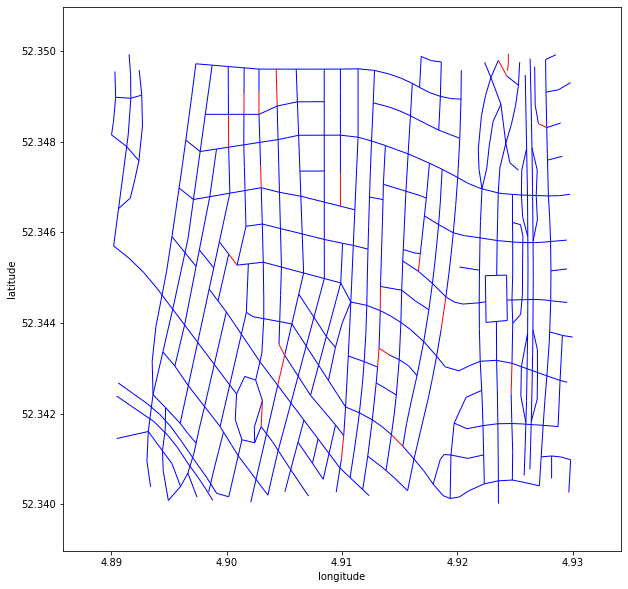

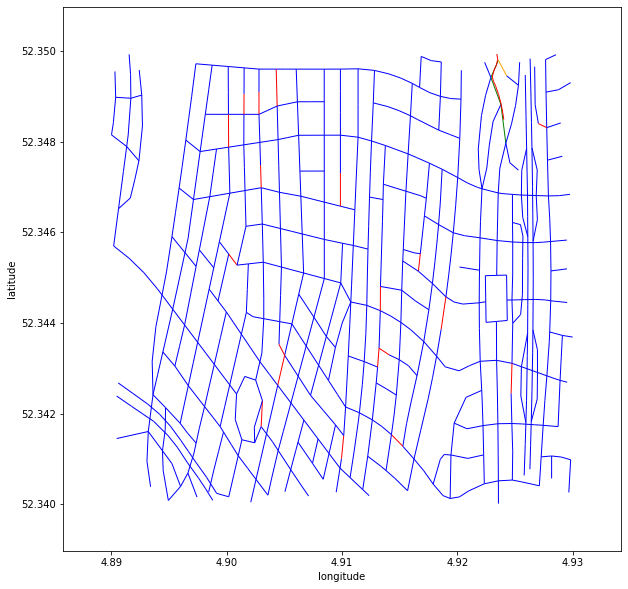

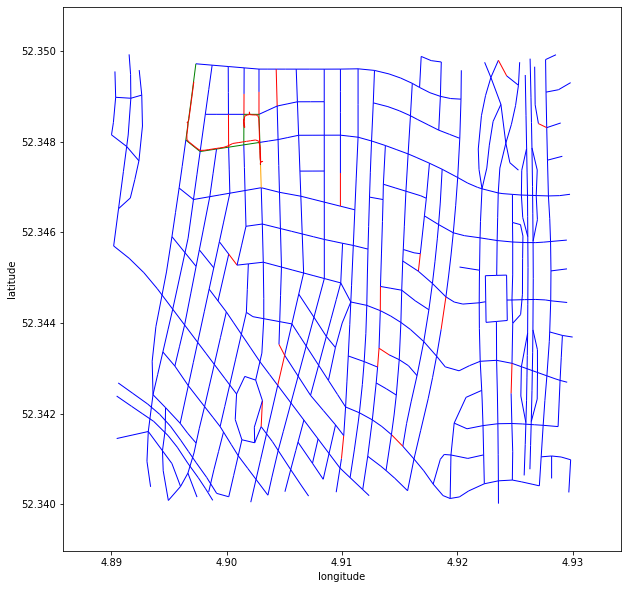

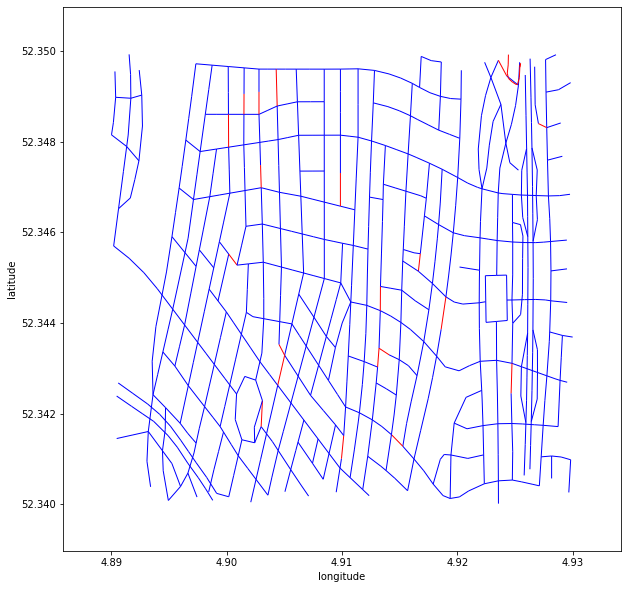

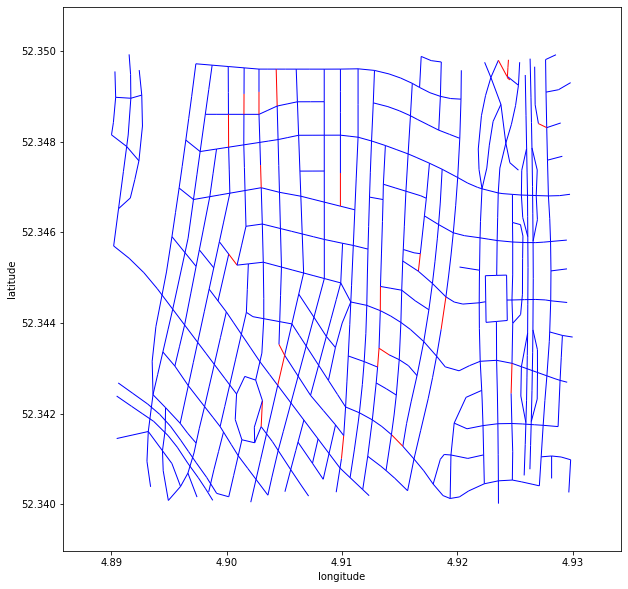

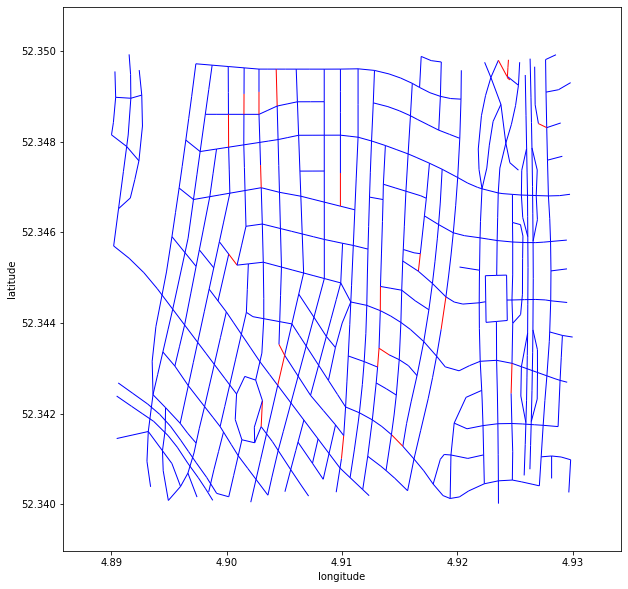

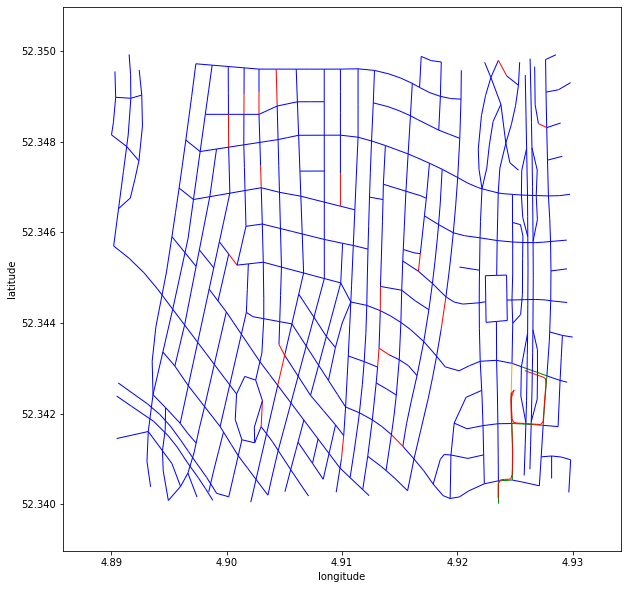

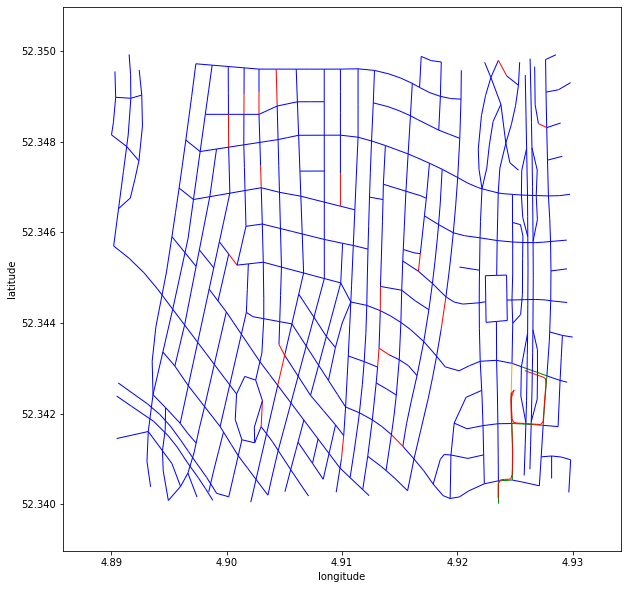

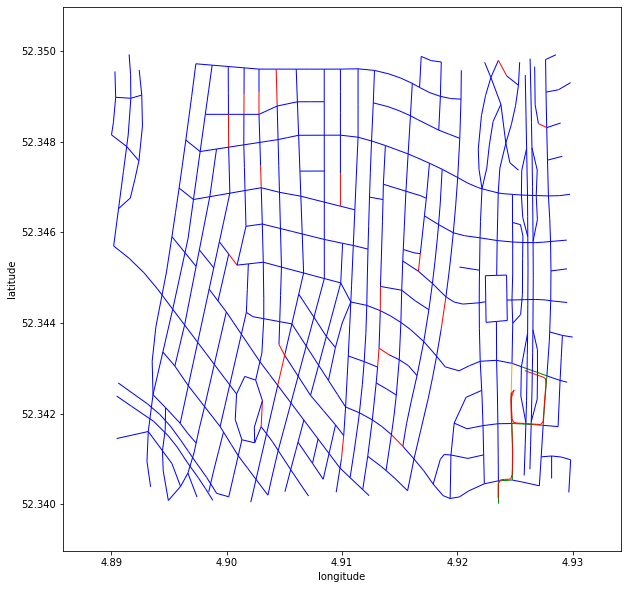

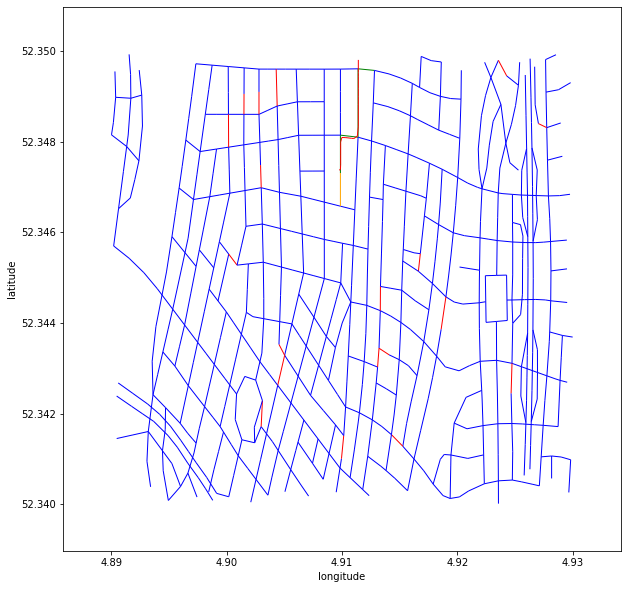

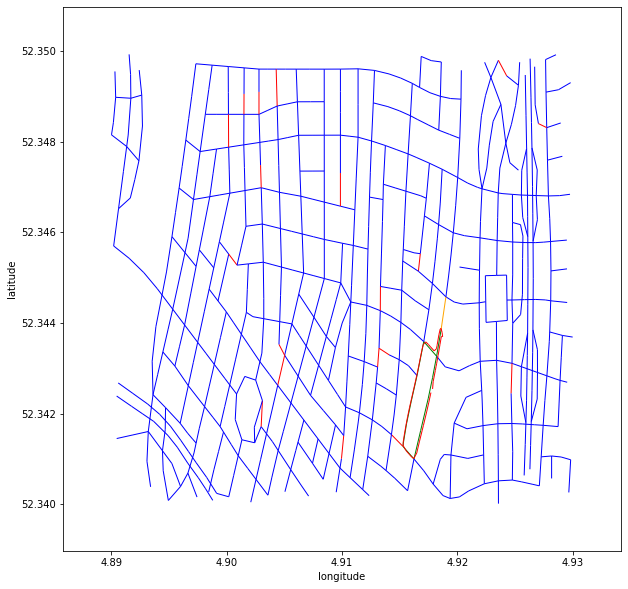

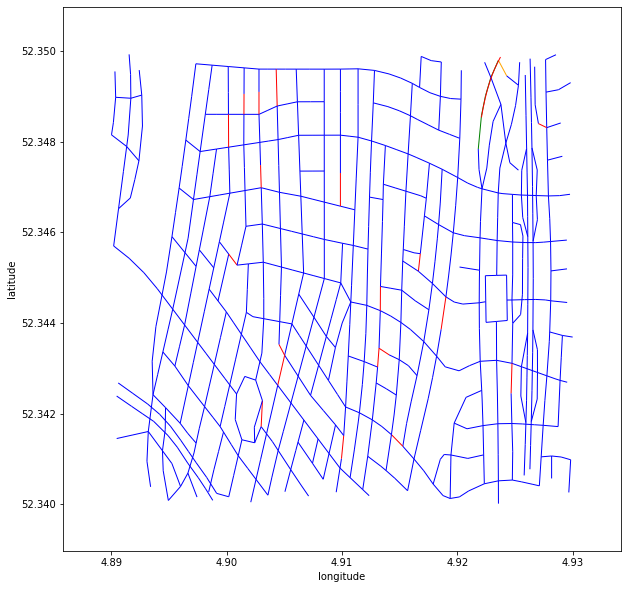

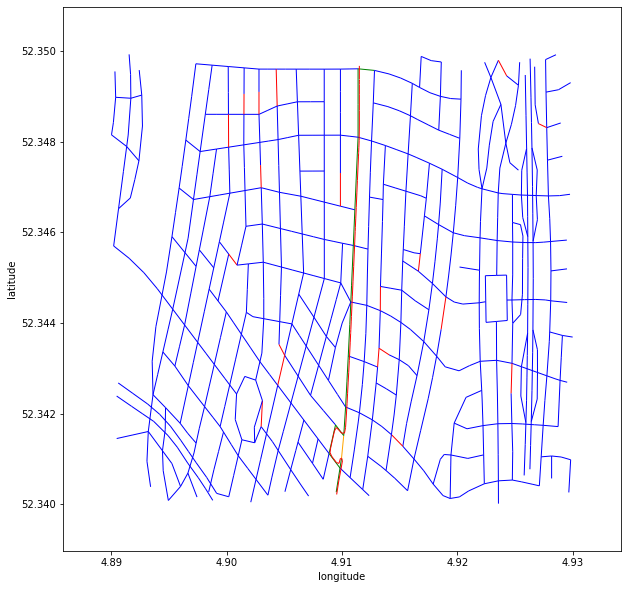

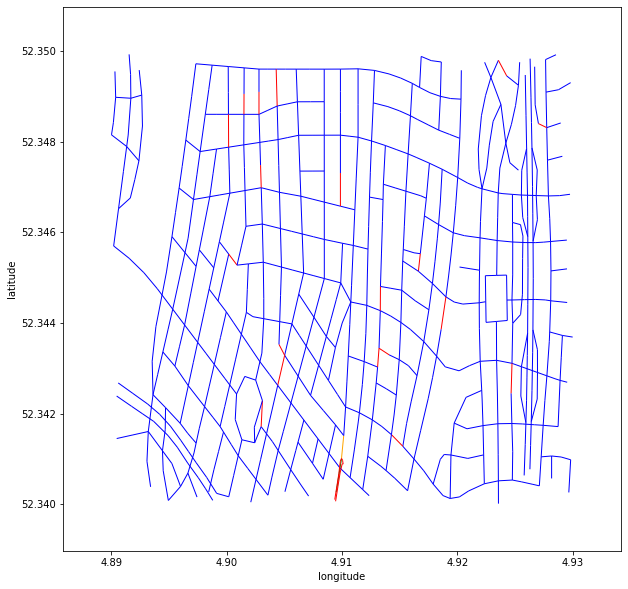

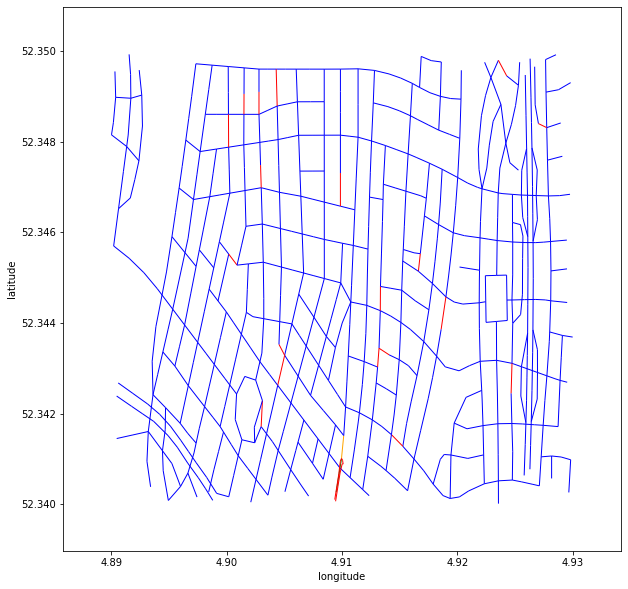

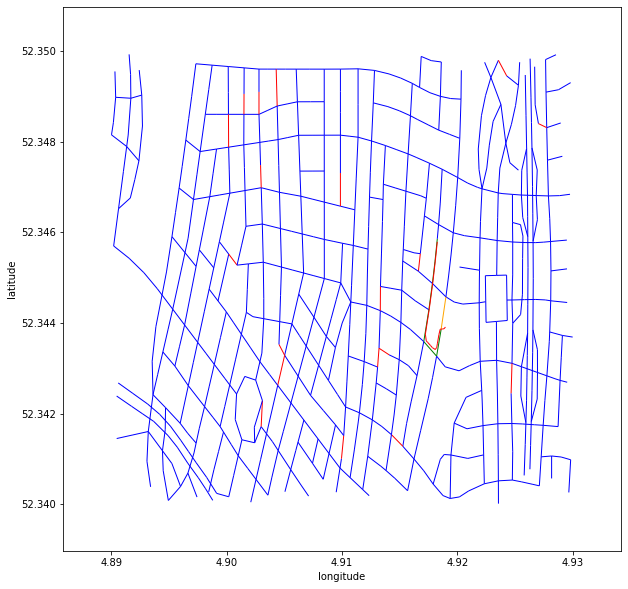

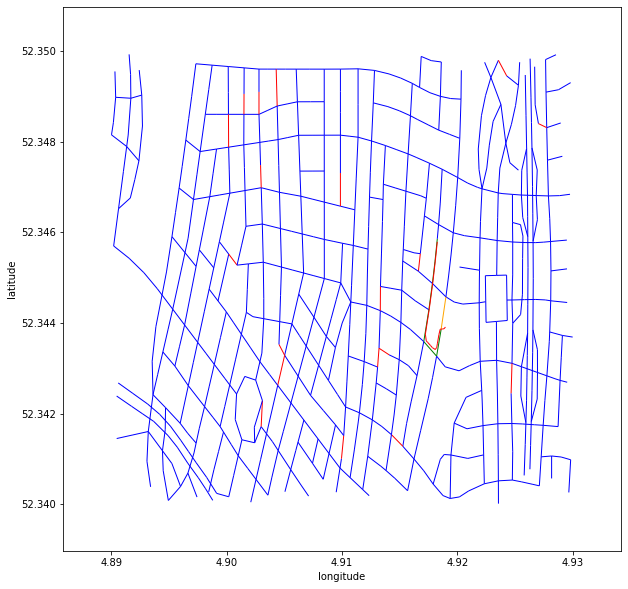

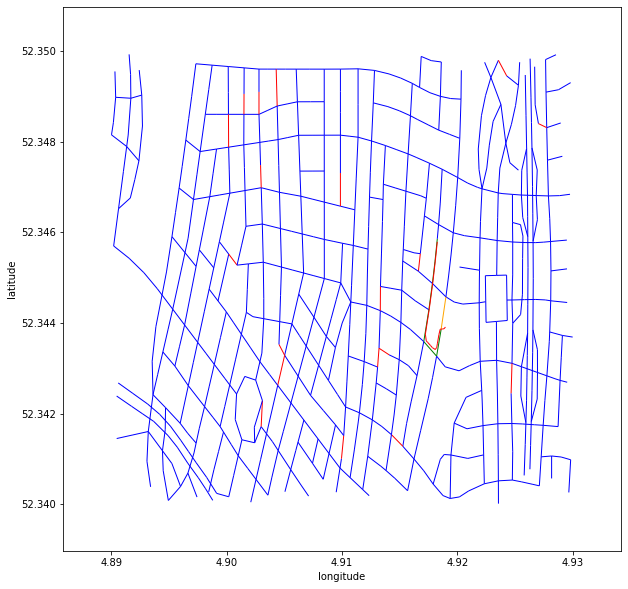

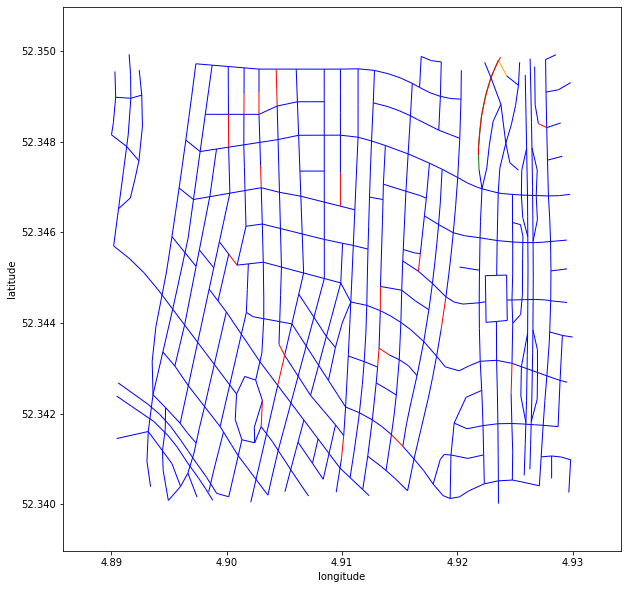

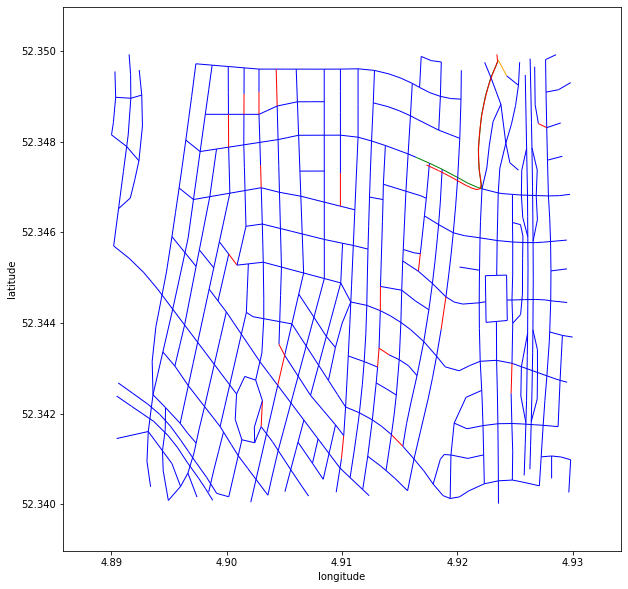

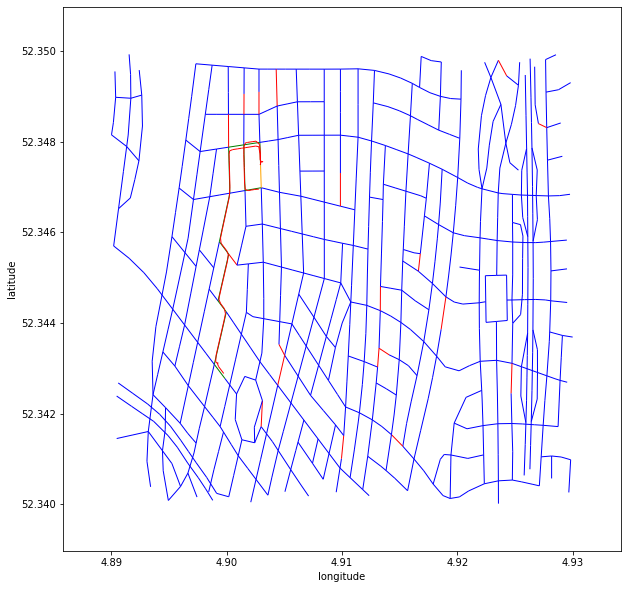

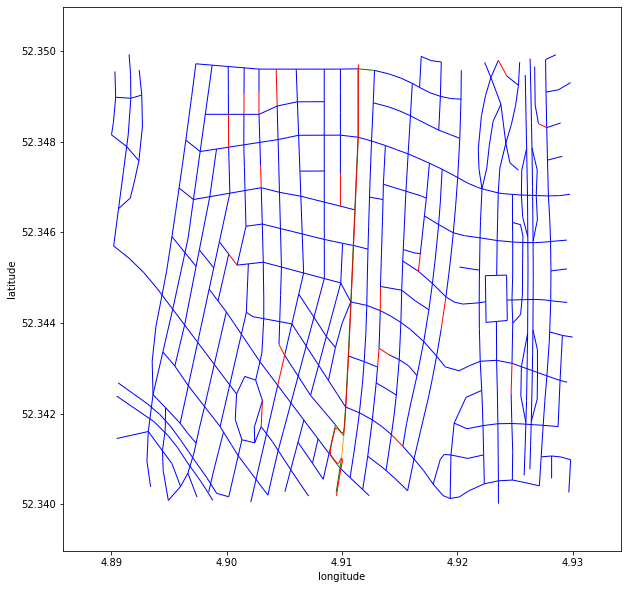

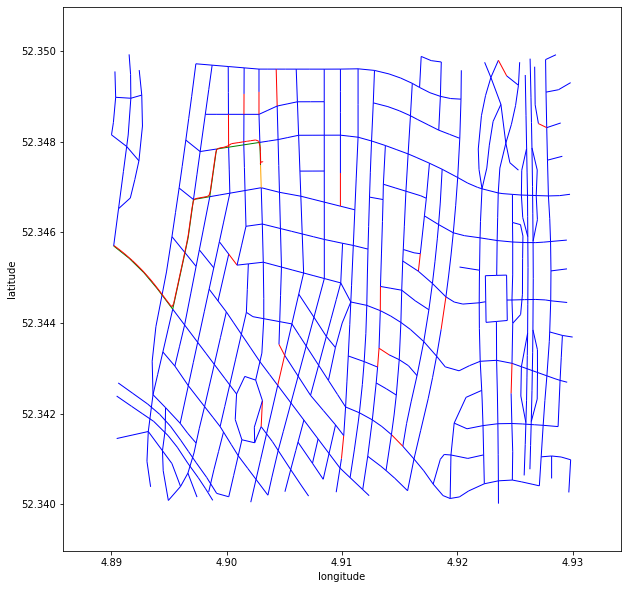

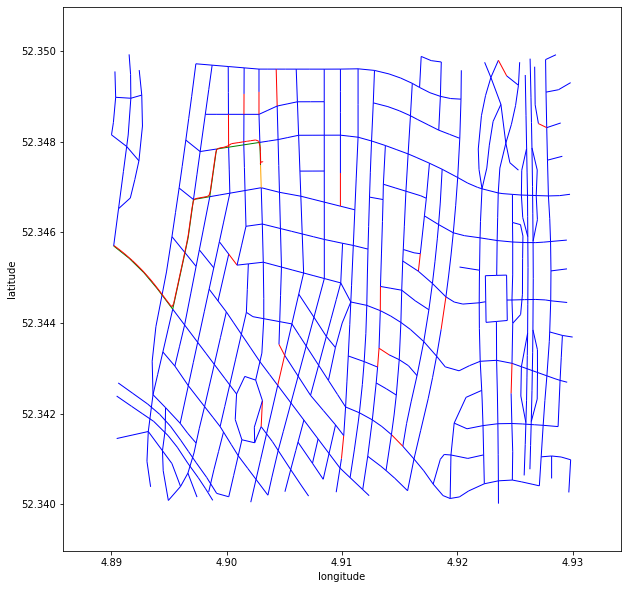

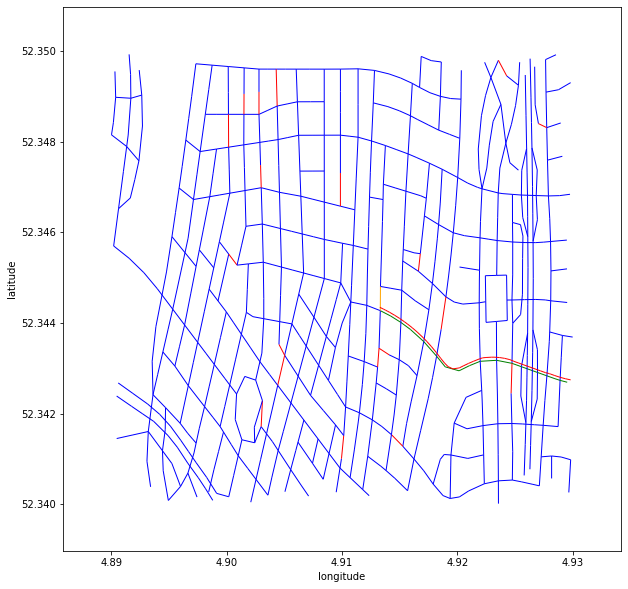

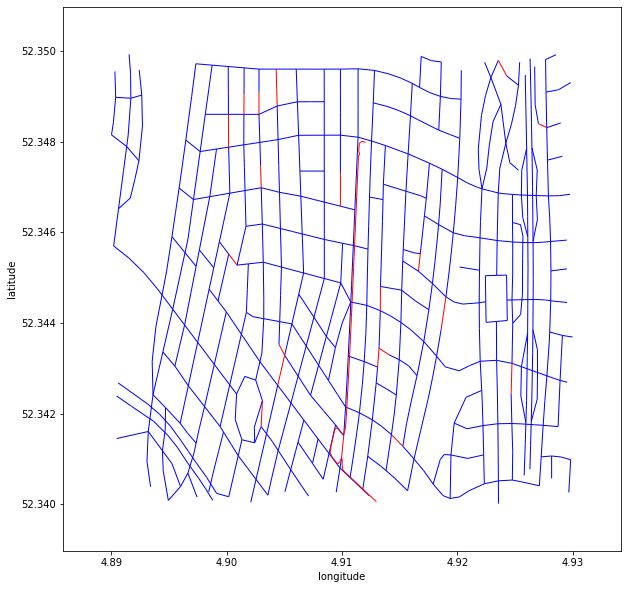

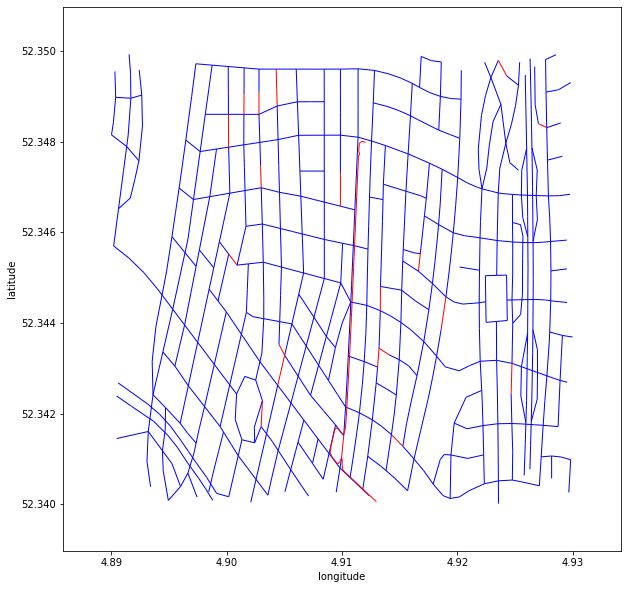

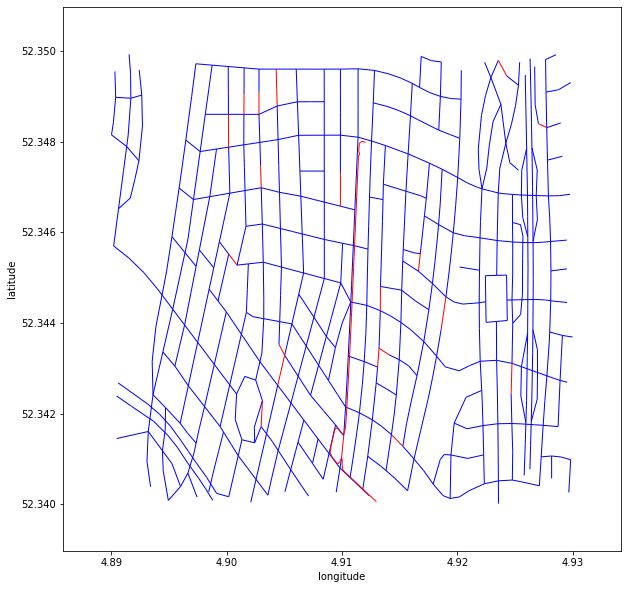

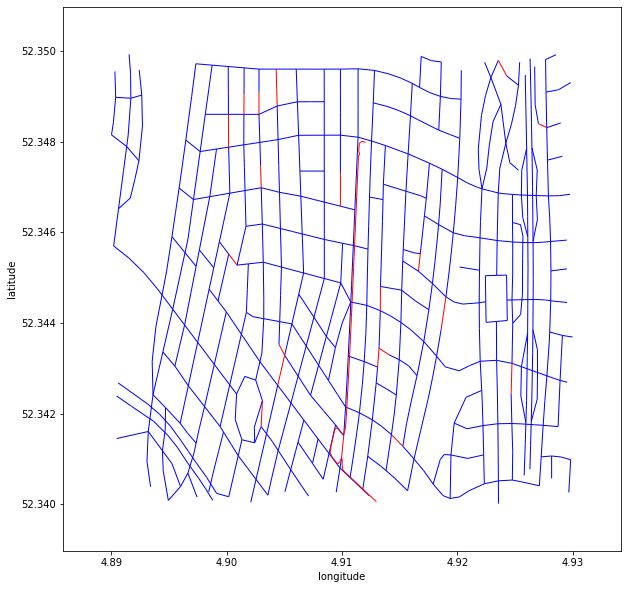

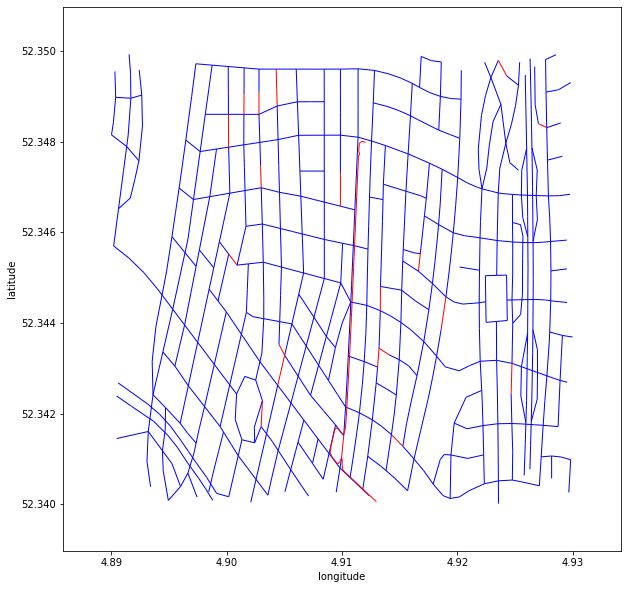

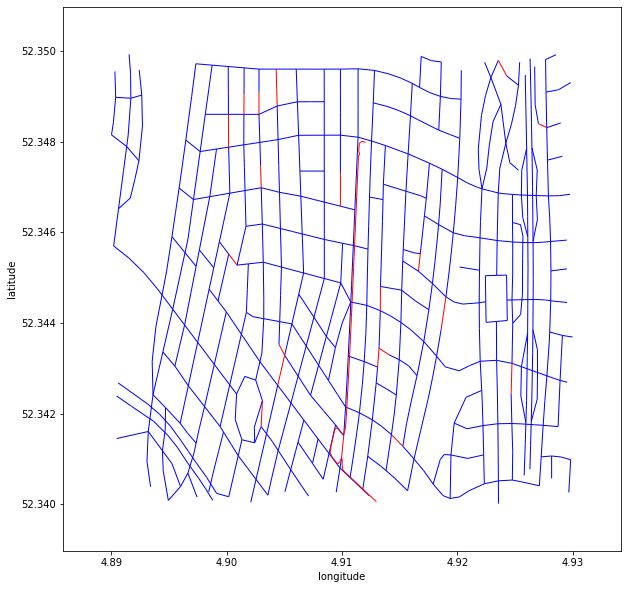

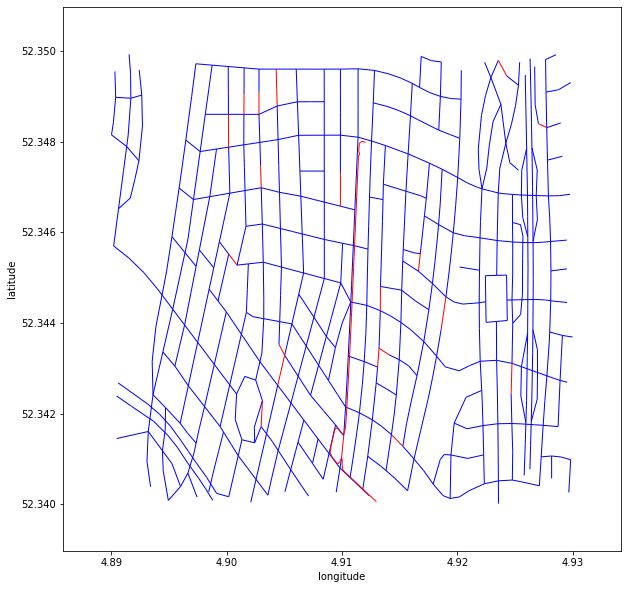

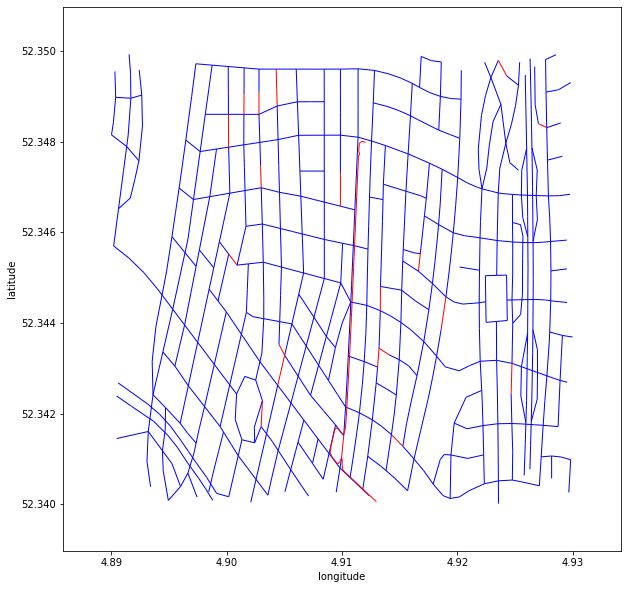

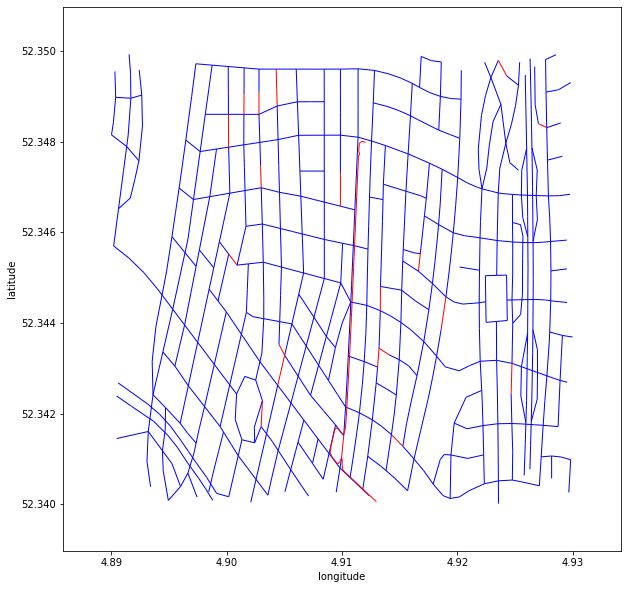

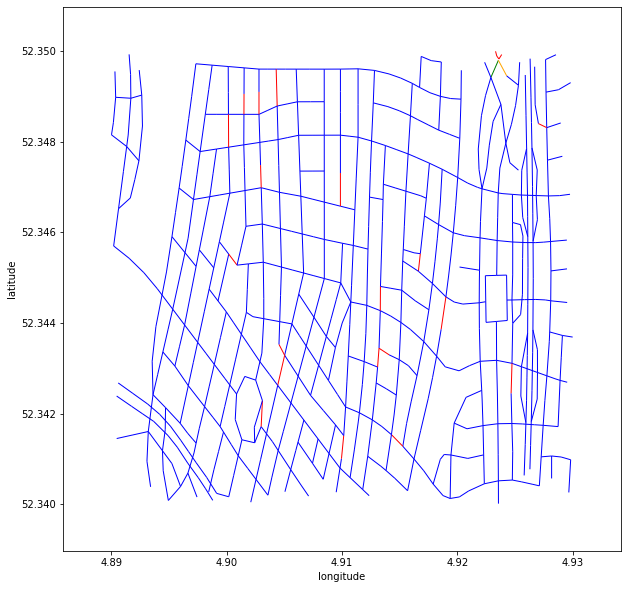

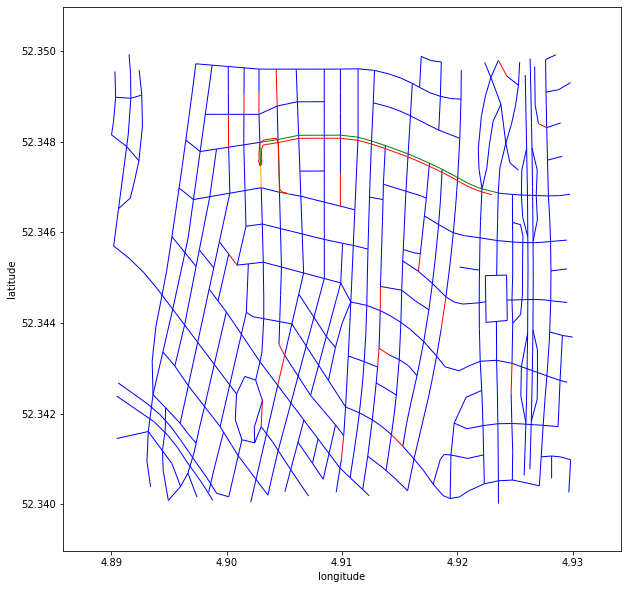

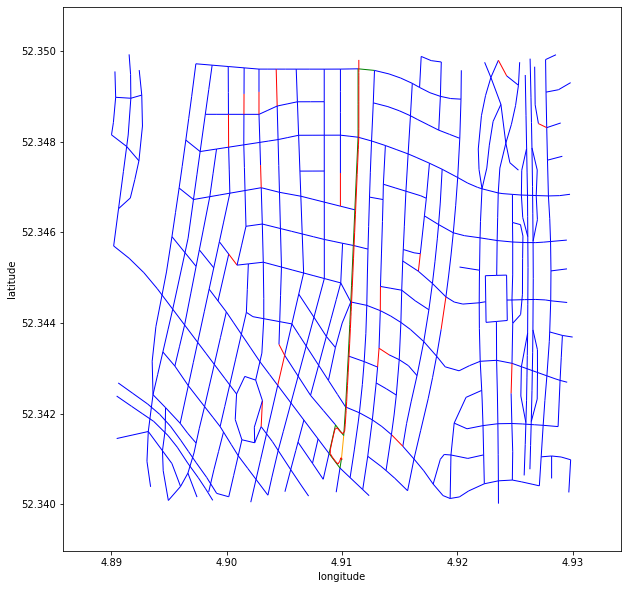

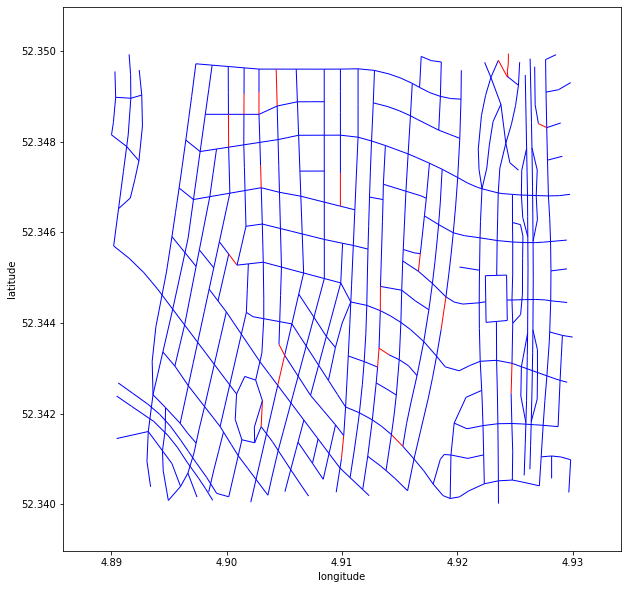

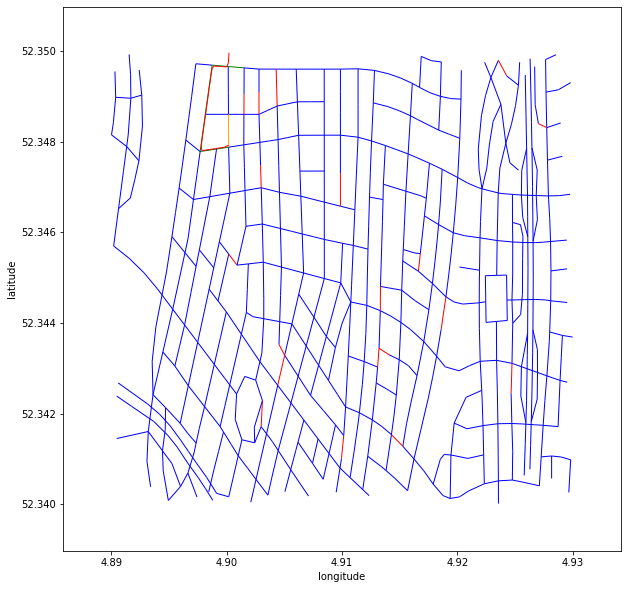

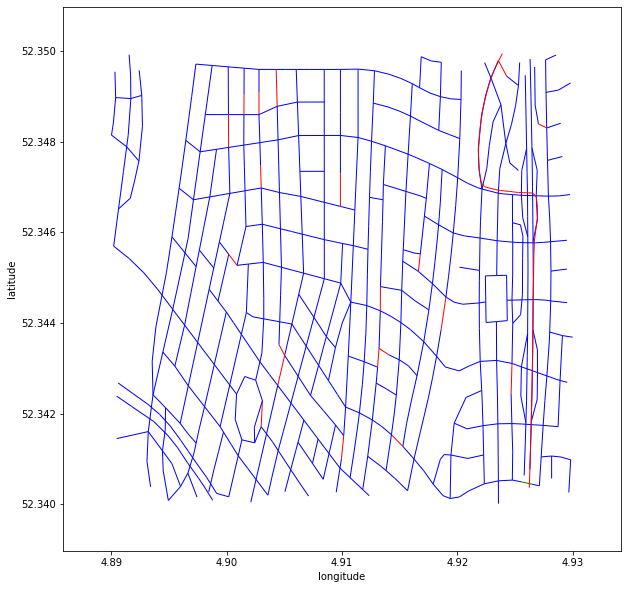

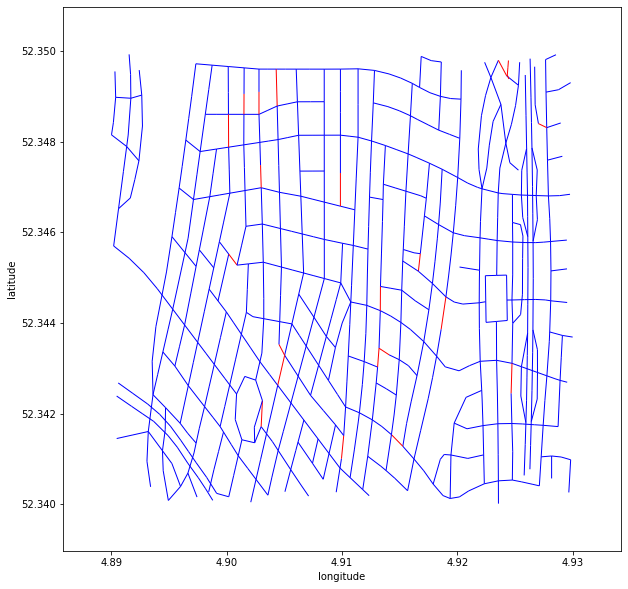

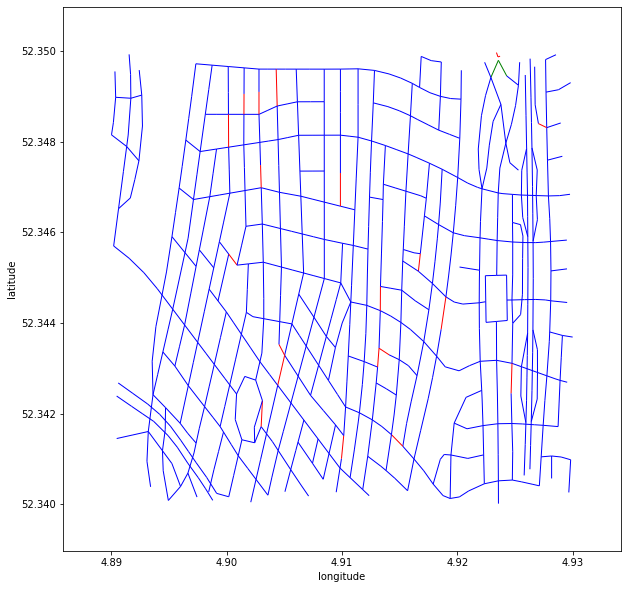

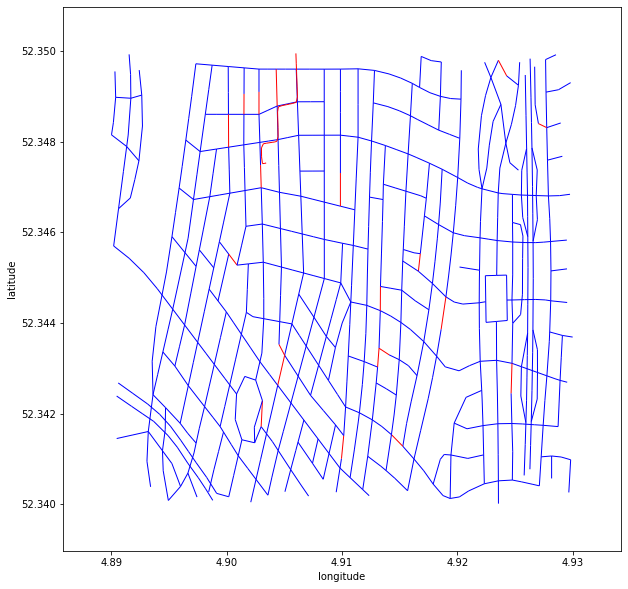

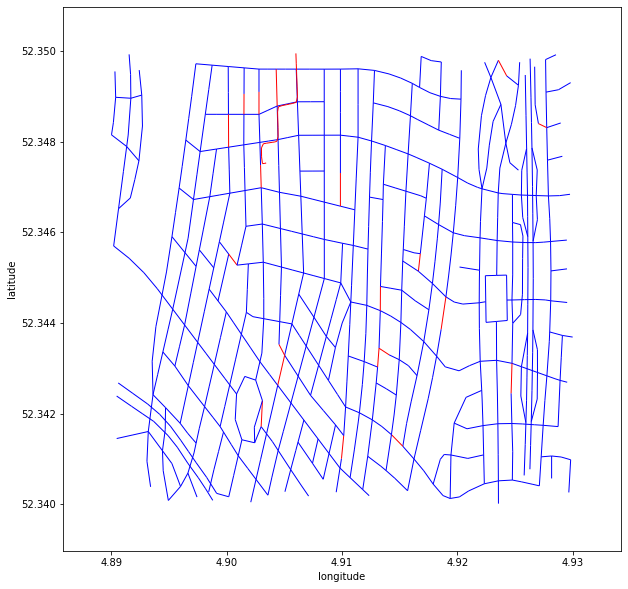

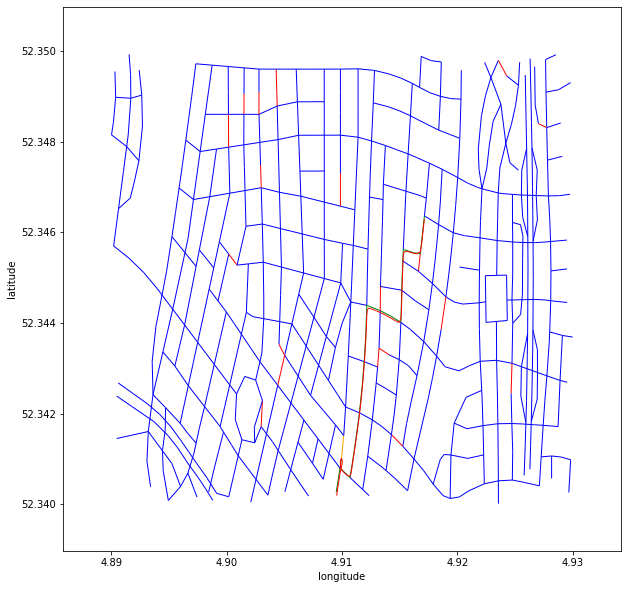

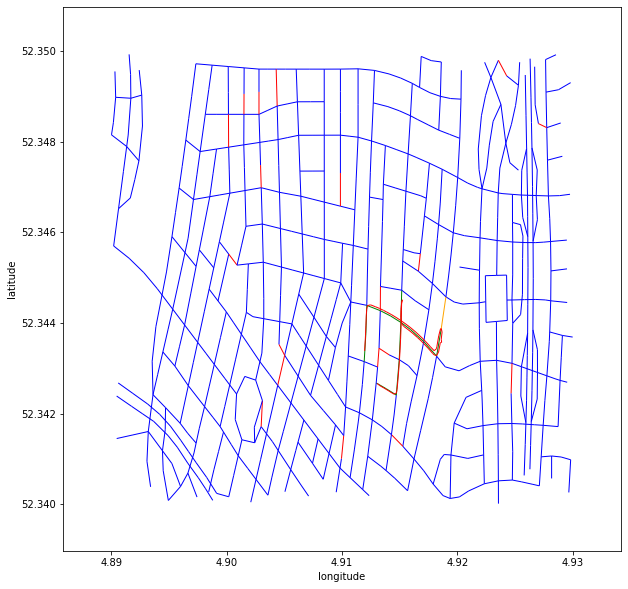

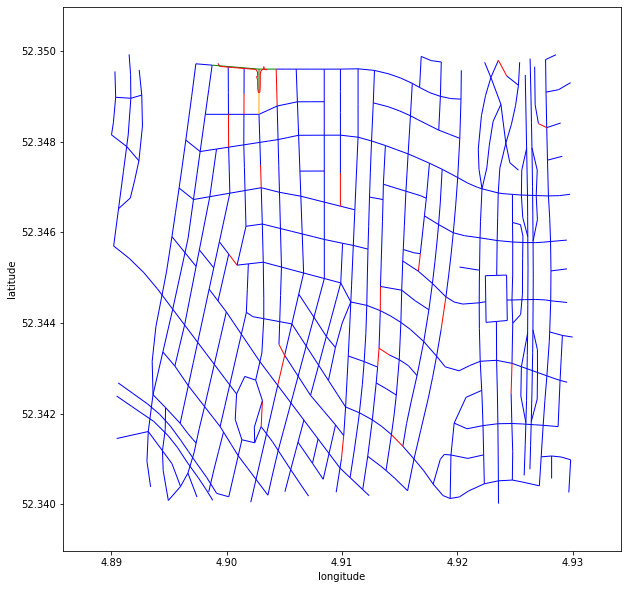

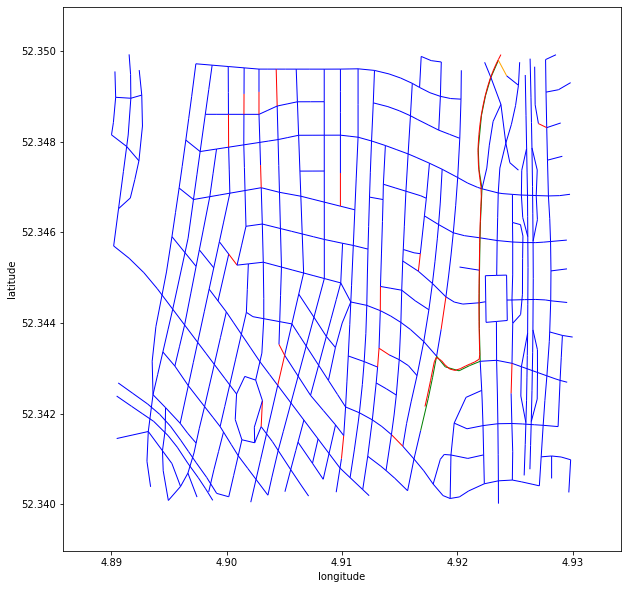

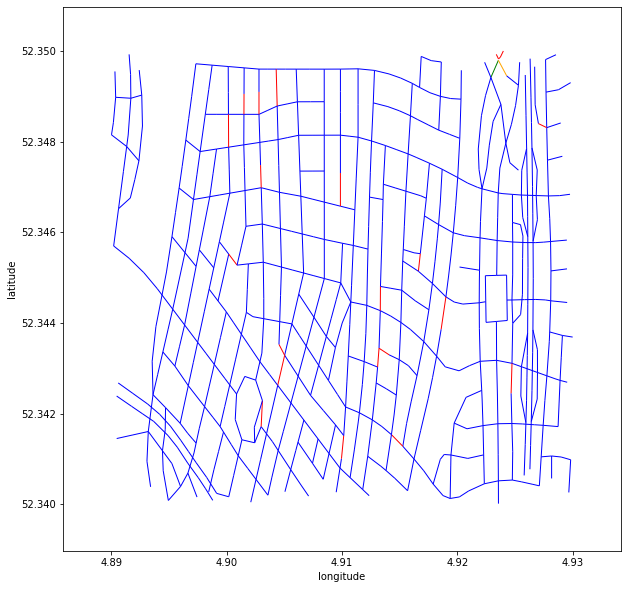

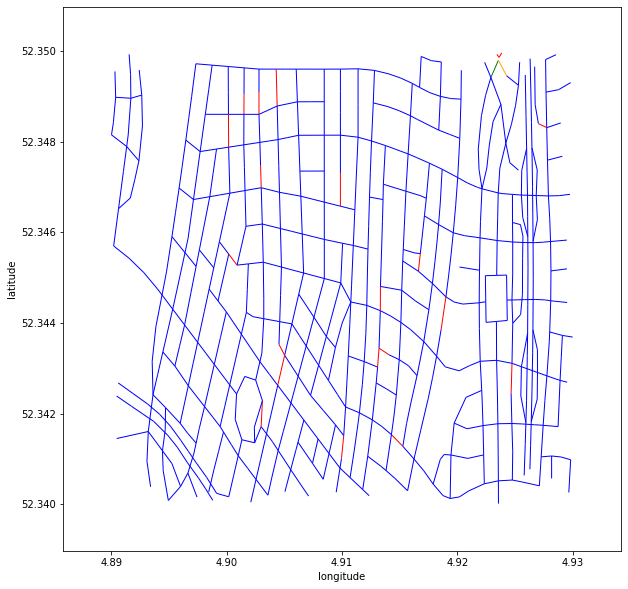

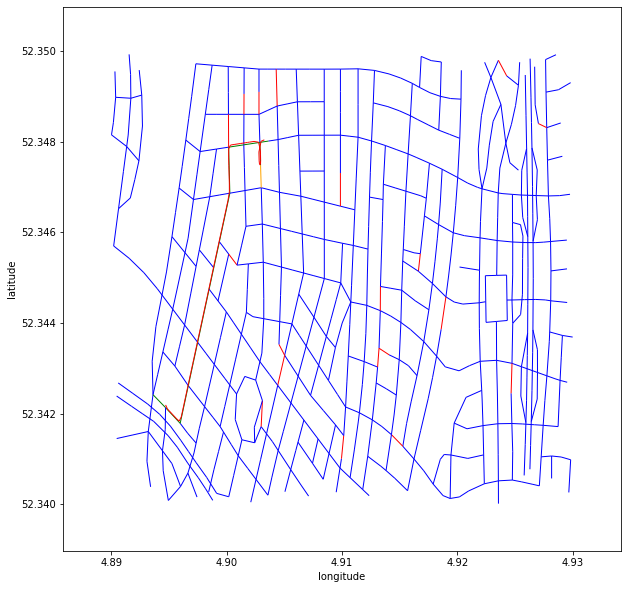

In [17]:

fixed = []

from tqdm import tqdm
pbar = tqdm(enumerate(mismatches))
for i, (t, path) in pbar:
    path = hmm_det.map_match_trajectory(t)
    G = G12_d.copy()
    mismatched_edges = [edge for edge in path if edge in removed_edges]
    if len(mismatched_edges) == 0:
        fixed.append(i)
    pbar.set_description(f'Found {len(fixed)} fixes')
    mismatched_colors = {edge: 'orange' for edge in mismatched_edges}
    path_cols = {edge: 'green' for edge in path if edge not in removed_edges}
    nx.set_edge_attributes(G, path_cols, name='color')
    nx.set_edge_attributes(G, mismatched_colors, name='color')
    plot_graph(snapshot_to_nxgraph(G, [t]), figsize=(10,10), show_img=False, savename=f'./hmm_mismatches/mismatch_{i}_rematched')

print(f'{len(fixed)}/{len(mismatches)} trajectories have been fixed st they dont traverse removed edges')

In [40]:

hmm_det = HMMChangeDetector(G1, use_latlon=True, obs_noise=4, obs_noise_ne=4, max_dist_init=100,
                max_dist=100, min_prob_norm=0.001, non_emitting_states=True, non_emitting_length_factor=0.75,
                max_lattice_width=None, dist_noise=10, dist_noise_ne=10, restrained_ne=True, avoid_goingback=True,
                enable_pbar=True)

fixed = []

from tqdm import tqdm
pbar = tqdm(enumerate(mismatches))
for i, (t, path) in pbar:
    path = hmm_det.map_match_trajectory(t)
    G = G12_d.copy()
    mismatched_edges = [edge for edge in path if edge in removed_edges]
    if len(mismatched_edges) == 0:
        fixed.append(i)
    pbar.set_description(f'Found {len(fixed)} fixes')
    mismatched_colors = {edge: 'orange' for edge in mismatched_edges}
    path_cols = {edge: 'green' for edge in path if edge not in removed_edges}
    nx.set_edge_attributes(G, path_cols, name='color')
    nx.set_edge_attributes(G, mismatched_colors, name='color')
    plot_graph(snapshot_to_nxgraph(G, [t]), figsize=(10,10), show_img=False, savename=f'./hmm_mismatches/mismatch_{i}_rematched')

print(f'{len(fixed)}/{len(mismatches)} trajectories have been fixed st they dont traverse removed edges')

[137, 160, 229]

In [12]:
from leuvenmapmatching.map.inmem import InMemMap

det = HMMChangeDetector(G1, use_latlon=False)
graph = det.format_map_hmm(det.G1)
map_latlon = InMemMap("G1", graph=graph, use_latlon=True, use_rtree=True, index_edges=True)
hmm_map = map_latlon.to_xy()

In [17]:
connections = list(hmm_map.all_edges())

In [33]:
G1_xy = nx.Graph()

for connection in connections:
    n1, n1_coords = connection[0], connection[1]
    n2, n2_coords = connection[2], connection[3]
    if n1 not in G1_xy.nodes:
        G1_xy.add_node(n1, label=n1, lat=n1_coords[1], lon=n1_coords[0])
    if n2 not in G1_xy.nodes:
        G1_xy.add_node(n2, label=n2, lat=n2_coords[1], lon=n2_coords[0])
        
    if (n1, n2) not in G1_xy.edges:
        G1_xy.add_edge(n1, n2, color='blue')

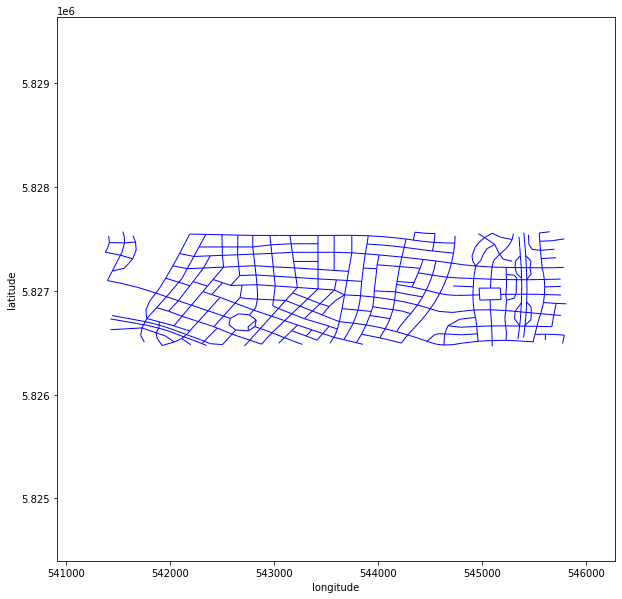

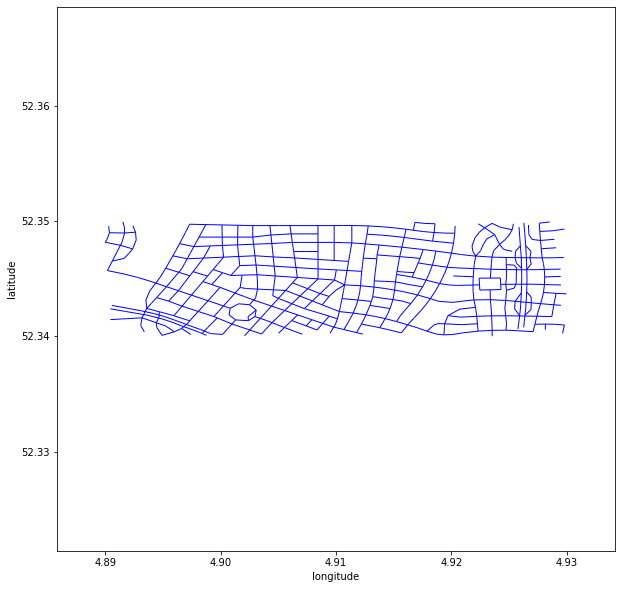

In [34]:
plot_graph(G1_xy, figsize=(10,10))
plot_graph(G1, figsize=(10,10))